
Here are some examples showing how to use this package. We'll start by showcasing the basic features, then progressively add more options.

In [1]:
# first, import the modules from the package
from antarctic_plots import profile
from antarctic_plots import fetch

#### Simple cross section, with default layers (Bedmap2)

#### line defined by 2 coordinates

In [2]:
# define to coordinates for a start and end of the line, in meters east and north (EPSG3031).

# from MBL to EANT
a=(-1200e3,-1400e3)
b=(1000e3, 1400e3)

# siple coast profile
# a=(-590e3,-1070e3)
# b=(-100e3,-545e3)

# call the main function, input the starting and ending points, and disable the map. 
profile.plot_profile(
    method='points',
    start=a,
    stop=b,
    add_map=False,
    )

In [4]:
# increase the resolution with the parameter "num"
profile.plot_profile(
    method='points',
    start=a,
    stop=b,
    num=500,
    add_map=False,
    )

: 

: 

#### line definded by a shapefile

No data profiles to plot


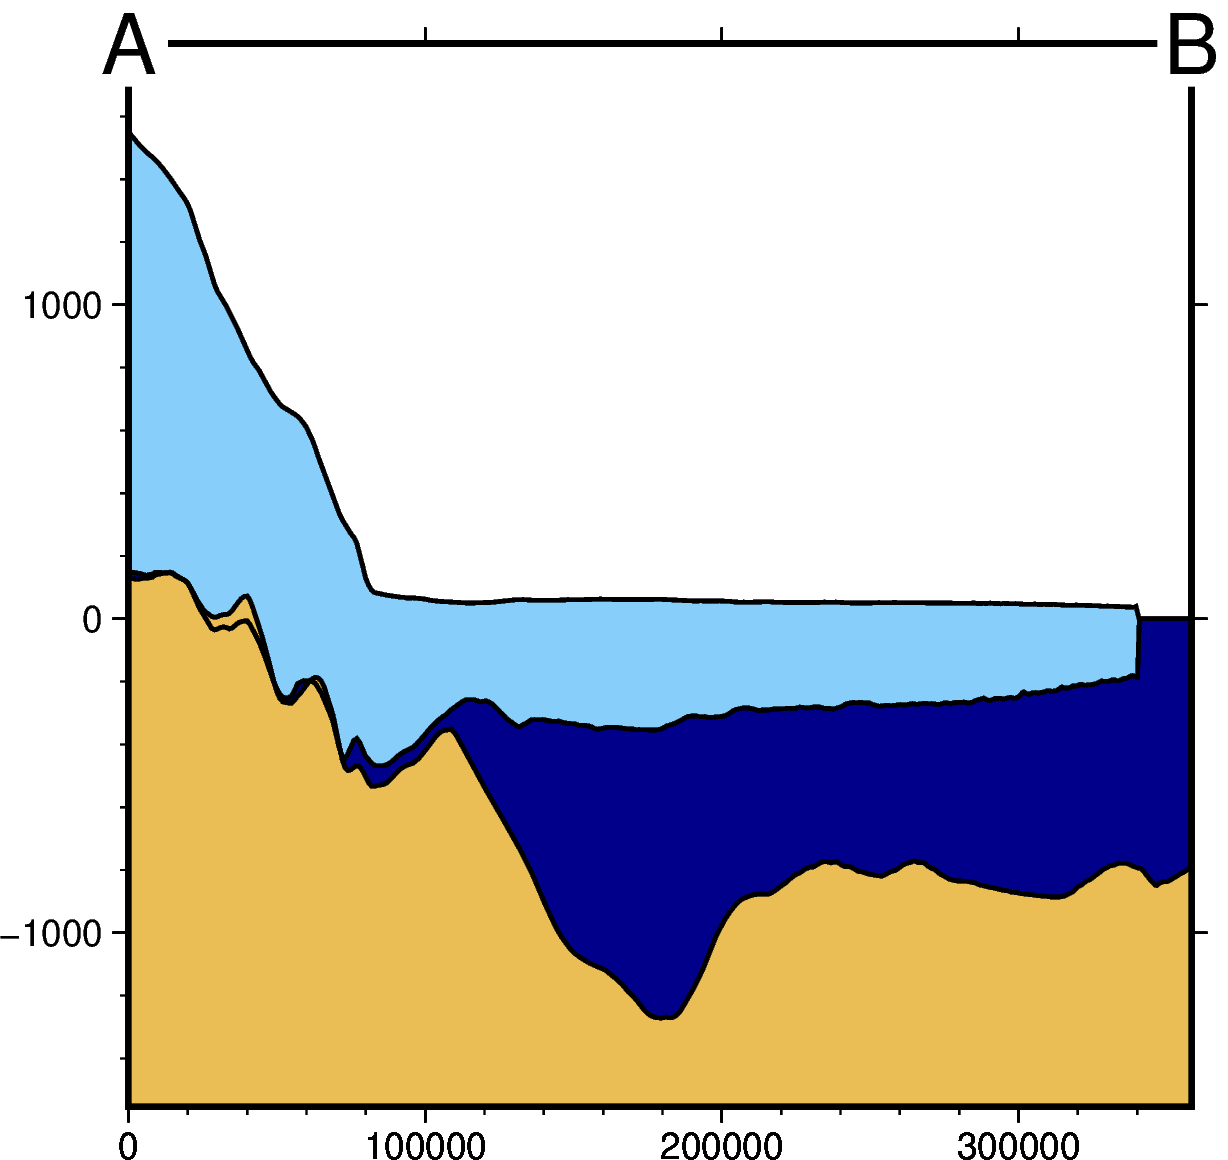

In [3]:
# use a pre-made shapefile to define the line
# defaults to an included shapefile over the Ross Ice Shelf
# from Mulock Glacier to the ice front through Discover Deep.
profile.plot_profile(
    method='shapefile',
    add_map=False,
    )

In [ ]:
# decrease resolution with parameter shp_num_points
profile.plot_profile(
    method='shapefile',
    add_map=False,
    shp_num_points=10,
    )

#### add map

In [ ]:
# add a map to show the location
profile.plot_profile(
    method='shapefile',
    add_map=True,
    )

In [ ]:
# change the map background to show the surface topography instead of imagery
profile.plot_profile(
    method='shapefile',
    add_map=True,
    map_background=fetch.bedmap2('surface')
    )

In [ ]:
# clip the profile (either end) based on distance
profile.plot_profile(
    method='shapefile',
    add_map=True,
    clip=True,
    min_dist=50e3,
    max_dist=200e3,
    )

#### add default datasets

In [ ]:
# sample and plot 2 default datasets, Free-air gravity and magnetic anomalies.
profile.plot_profile(
    method='shapefile',
    add_map=True,
    data_dict='default',
    save=True, # save the plot to use in README 
    path='../cover_fig.png'
    )

In [ ]:
# get default bedmap2 layers
layers_dict=profile.default_layers()
# add dictionary entry of extra layers
layers_dict['basement']={}
layers_dict['basement']['name']='basement'
layers_dict['basement']['grid']=fetch.basement()
layers_dict['basement']['color']='chocolate'


In [ ]:
# include your own grid files for both the cross section and the data profile

# use function make_data_dict to specify grids and colors for data profile
data_dict = profile.make_data_dict(['Bouguer gravity', 'DeepBedMap'], [fetch.gravity('BA'), fetch.deepbedmap()], ['purple', 'red'])

# get default bedmap2 layers
layers_dict=profile.default_layers()
# add dictionary entry of extra layers
layers_dict['basement']={}
layers_dict['basement']['name']='basement'
layers_dict['basement']['grid']=fetch.basement()
layers_dict['basement']['color']='chocolate'

profile.plot_profile(
    method='shapefile',
    add_map=True,
    data_dict=data_dict,
    layers_dict=layers_dict,
    )